**Import library**

In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Load dataset**

In [2]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

In [3]:
# Load dataset
def load_data():
    data =pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Corona_NLP_train.csv", engine='python')
    return data

In [4]:
tweet_df = load_data()
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [18]:
tweet_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive,1
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,1
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,0
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,1
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,4
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral,0
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2


**Experimental Setup**

In this step, we have to setup our research dataset. To put it more simply, first of all, we have to drop unnecessary columns, map the target variable, and remove null values. In this way, dataset will be ready for experiment.

**Drop Unnecessary columns**

In [22]:
tweet_df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1, inplace=True)

**Map the target variable**

In [23]:
d = {'Neutral': 0, 'Positive': 1, 'Extremely Positive': 2,'Extremely Negative': 3,'Negative': 4}
tweet_df['label'] = tweet_df['Sentiment'].map(d)

In [24]:
tweet_df.tail(10)

,OriginalTweet,Sentiment,label
41141,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral,0
41142,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive,2
41143,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral,0
41145,How exactly are we going to re-open New York C...,Positive,1
41146,#Gold prices rose to a more than 7-year high t...,Positive,1
41147,Yall really shitting that much more at home??...,Negative,4
41149,Still shocked by the number of #Toronto superm...,Negative,4
41150,I never that wed be in a situation &amp; worl...,Positive,1
41152,Airline pilots offering to stock supermarket s...,Neutral,0
41156,@TartiiCat Well new/used Rift S are going for ...,Negative,4


**Check how much null values we have**

In [25]:
tweet_df.isnull().sum()

OriginalTweet    0
Sentiment        0
label            0
dtype: int64

**Remove the null values from our dataset**

In [26]:
tweet_df= tweet_df.dropna()

In [27]:
tweet_df.isnull().sum()

OriginalTweet    0
Sentiment        0
label            0
dtype: int64

**Data Preparation** <br>
Data Preparation consists of Text preprocessing. Data also collected from various sources so it may contains numerous of noise that should be preprocessed in order to get better accuracy. We will be followed by the step for data preparation:

Step A : Converting html entities <br>
Step B : Removing "@user" from all the tweets <br>
Step C : Changing all the tweets into lowercase <br>
Step D : Apostrophe Lookup <br>
Step E : Short Word Lookup <br>
Step F : Emoticon Lookup <br>
Step H : Replacing Special Characters with space <br>
Step I : Replacing Numbers (integers) with space <br>
Step J : Removing words whom length is 1 <br>
Step K : Tokenization - Converting a sentence into list of words <br>
Step L : Remove stopwords <br>
Step M : Lammetization/stemming - Tranforming any form of a word to its root word <br>

In [12]:
#Essential link: https://www.kaggle.com/gauravchhabra/nlp-twitter-sentiment-analysis-project

**STEP A: Converting HTML entities**

In [15]:
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [28]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [30]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
tweet_df['clean_tweet'] = tweet_df['OriginalTweet'].apply(lambda x: html_parser.unescape(x))
tweet_df.tail(10)

,OriginalTweet,Sentiment,label,clean_tweet
41141,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral,0,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...
41142,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive,2,@MajangChien @MTNSSD @MTNSSD is worst than COV...
41143,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral,0,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...
41145,How exactly are we going to re-open New York C...,Positive,1,How exactly are we going to re-open New York C...
41146,#Gold prices rose to a more than 7-year high t...,Positive,1,#Gold prices rose to a more than 7-year high t...
41147,Yall really shitting that much more at home??...,Negative,4,Yall really shitting that much more at home??...
41149,Still shocked by the number of #Toronto superm...,Negative,4,Still shocked by the number of #Toronto superm...
41150,I never that wed be in a situation &amp; worl...,Positive,1,I never that wed be in a situation & world th...
41152,Airline pilots offering to stock supermarket s...,Neutral,0,Airline pilots offering to stock supermarket s...
41156,@TartiiCat Well new/used Rift S are going for ...,Negative,4,@TartiiCat Well new/used Rift S are going for ...


**Step B : Removing "@user" from all the tweets**

In [31]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [34]:
# remove twitter handles (@user)
tweet_df['clean_tweet'] = np.vectorize(remove_pattern)(tweet_df['clean_tweet'], "@[\w]*")
tweet_df.tail(10)

,OriginalTweet,Sentiment,label,clean_tweet
41141,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral,0,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...
41142,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive,2,is worst than COVID-19. All businesses have...
41143,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral,0,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...
41145,How exactly are we going to re-open New York C...,Positive,1,How exactly are we going to re-open New York C...
41146,#Gold prices rose to a more than 7-year high t...,Positive,1,#Gold prices rose to a more than 7-year high t...
41147,Yall really shitting that much more at home??...,Negative,4,Yall really shitting that much more at home??...
41149,Still shocked by the number of #Toronto superm...,Negative,4,Still shocked by the number of #Toronto superm...
41150,I never that wed be in a situation &amp; worl...,Positive,1,I never that wed be in a situation & world th...
41152,Airline pilots offering to stock supermarket s...,Neutral,0,Airline pilots offering to stock supermarket s...
41156,@TartiiCat Well new/used Rift S are going for ...,Negative,4,Well new/used Rift S are going for $700.00 on...


**Step C : Changing all the tweets into lowercase**

In [36]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: x.lower())
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https://t.co/ifz9fan2pa and https://t.co/xx...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia: woolworths to give elde...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the regions first confirmed covid-...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today. didn't buy toile...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid-19 our retail store and classroom...
9,"For corona prevention,we should stop to buy th...",Negative,4,"for corona prevention,we should stop to buy th..."
10,All month there hasn't been crowding in the su...,Neutral,0,all month there hasn't been crowding in the su...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,"due to the covid-19 situation, we have increas..."


**Step D : Apostrophe Lookup**

In [37]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [38]:
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [39]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [40]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https://t.co/ifz9fan2pa and https://t.co/xx...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia: woolworths to give elde...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the regions first confirmed covid-...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today. did not buy toil...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid-19 our retail store and classroom...
9,"For corona prevention,we should stop to buy th...",Negative,4,"for corona prevention,we should stop to buy th..."
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,"due to the covid-19 situation, we have increas..."


**Step E : Short Word Lookup**

In [41]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [42]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https://t.co/ifz9fan2pa and https://t.co/xx...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia: woolworths to give elde...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the regions first confirmed covid-...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today. did not buy toil...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid-19 our retail store and classroom...
9,"For corona prevention,we should stop to buy th...",Negative,4,"for corona prevention,we should stop to buy th..."
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,"due to the covid-19 situation, we have increas..."


**Step F : Emoticon Lookup**

In [43]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [44]:
emoticon_dict

{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [45]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https://t.co/ifz9fan2pa and https://t.co/xx...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia: woolworths to give elde...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the regions first confirmed covid-...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today. did not buy toil...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid-19 our retail store and classroom...
9,"For corona prevention,we should stop to buy th...",Negative,4,"for corona prevention,we should stop to buy th..."
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,"due to the covid-19 situation, we have increas..."


**Step G : ReplacingPunctuations with space**

In [46]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https t co ifz9fan2pa and https t co xx...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths to give elde...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the region s first confirmed covid ...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today did not buy toil...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid 19 our retail store and classroom...
9,"For corona prevention,we should stop to buy th...",Negative,4,for corona prevention we should stop to buy th...
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,due to the covid 19 situation we have increas...


**Step H : Replacing Special Characters with space**

In [47]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https t co ifz9fan2pa and https t co xx...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths to give elde...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the region s first confirmed covid ...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today did not buy toil...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid 19 our retail store and classroom...
9,"For corona prevention,we should stop to buy th...",Negative,4,for corona prevention we should stop to buy th...
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,due to the covid 19 situation we have increas...


**Step I : Replacing Numbers (integers) with space**

In [48]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https t co ifz fan pa and https t co xx...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths to give elde...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the region s first confirmed covid ...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today did not buy toil...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid our retail store and classroom...
9,"For corona prevention,we should stop to buy th...",Negative,4,for corona prevention we should stop to buy th...
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,due to the covid situation we have increas...


**Step J : Removing words whom length is 1**

In [49]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
tweet_df['clean_tweet'][0:5]

0    https co ifz fan pa and https co xx ghgfzcc an...
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
5    as news of the region first confirmed covid ca...
6    cashier at grocery store was sharing his insig...
Name: clean_tweet, dtype: object

**Step K : Spelling Correction - With TextBlob Library**

In [53]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [51]:
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this bech??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this bench??


In [54]:
# we can see all the similar matches our first error along with the probability score.
blob.words[3].spellcheck()

[('sitting', 0.8078078078078078),
 ('setting', 0.11411411411411411),
 ('string', 0.036036036036036036),
 ('sting', 0.02702702702702703),
 ('stating', 0.015015015015015015)]

**Applying TextBlob on our data set - Spelling correction**

In [56]:
# Not cleaning the just showing the spelling check as its take lot of time to process all these tweets
## Shown sample how its must done
text = tweet_df['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0     http co if fan pa and http co xx ghgfzcc and h...
1     advice talk to your neighbours family to excha...
2     coronavirus australia woolworths to give elder...
5     as news of the region first confirmed could ca...
6     cashier at grocer store was sharing his insigh...
7     was at the supermarket today did not buy toile...
8     due to could our retail store and classroom in...
9     for corona prevention we should stop to buy th...
10    all month there has not been crowding in the s...
11    due to the could situation we have increased d...
Name: clean_tweet, dtype: object

In [57]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [58]:
# Creating token for the clean tweets
tweet_df['tweet_token'] = tweet_df['clean_tweet'].apply(lambda x: word_tokenize(x))

In [59]:
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https co ifz fan pa and https co xx ghgfzcc an...,"[https, co, ifz, fan, pa, and, https, co, xx, ..."
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,..."
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the region first confirmed covid ca...,"[as, news, of, the, region, first, confirmed, ..."
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...,"[cashier, at, grocery, store, was, sharing, hi..."
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today did not buy toile...,"[was, at, the, supermarket, today, did, not, b..."
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid our retail store and classroom in...,"[due, to, covid, our, retail, store, and, clas..."
9,"For corona prevention,we should stop to buy th...",Negative,4,for corona prevention we should stop to buy th...,"[for, corona, prevention, we, should, stop, to..."
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...,"[all, month, there, has, not, been, crowding, ..."
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,due to the covid situation we have increased d...,"[due, to, the, covid, situation, we, have, inc..."


In [61]:
# Importing stop words from NLTK corpus for english language
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [63]:
# Created new columns of tokens - where stop words are being removed
tweet_df['tweet_token_filtered'] = tweet_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
tweet_df[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[https, co, ifz, fan, pa, and, https, co, xx, ...","[https, co, ifz, fan, pa, https, co, xx, ghgfz..."
1,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p..."
2,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld..."
5,"[as, news, of, the, region, first, confirmed, ...","[news, region, first, confirmed, covid, case, ..."
6,"[cashier, at, grocery, store, was, sharing, hi...","[cashier, grocery, store, sharing, insights, c..."
7,"[was, at, the, supermarket, today, did, not, b...","[supermarket, today, buy, toilet, paper, rebel..."
8,"[due, to, covid, our, retail, store, and, clas...","[due, covid, retail, store, classroom, atlanta..."
9,"[for, corona, prevention, we, should, stop, to...","[corona, prevention, stop, buy, things, cash, ..."
10,"[all, month, there, has, not, been, crowding, ...","[month, crowding, supermarkets, restaurants, h..."
11,"[due, to, the, covid, situation, we, have, inc...","[due, covid, situation, increased, demand, foo..."


**We will create 2 new columns**

*   One For Stemming
*   Second For Lemmatization

The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [64]:
#Stemming - Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [65]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [66]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
tweet_df['tweet_stemmed'] = tweet_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
tweet_df['tweet_stemmed'].head(10)

0     http co ifz fan pa http co xx ghgfzcc http co ...
1     advic talk neighbour famili exchang phone numb...
2     coronaviru australia woolworth give elderli di...
5     news region first confirm covid case came sull...
6     cashier groceri store share insight covid prov...
7     supermarket today buy toilet paper rebel toile...
8     due covid retail store classroom atlanta open ...
9     corona prevent stop buy thing cash use onlin p...
10    month crowd supermarket restaur howev reduc ho...
11    due covid situat increas demand food product w...
Name: tweet_stemmed, dtype: object

Lemmatization - Lemmatization is the process of converting a word to its base form.

In [70]:
# Importing library for lemmatizing
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [71]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
tweet_df['tweet_lemmatized'] = tweet_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
tweet_df['tweet_lemmatized'].head(10)

0     http co ifz fan pa http co xx ghgfzcc http co ...
1     advice talk neighbour family exchange phone nu...
2     coronavirus australia woolworth give elderly d...
5     news region first confirmed covid case came su...
6     cashier grocery store sharing insight covid pr...
7     supermarket today buy toilet paper rebel toile...
8     due covid retail store classroom atlanta open ...
9     corona prevention stop buy thing cash use onli...
10    month crowding supermarket restaurant however ...
11    due covid situation increased demand food prod...
Name: tweet_lemmatized, dtype: object

In [73]:
# Our final dataframe - Fully formatted, Processed, Noise less, Cleaned, ready to analyse
## for further analysis we consider 2 columns i.e. "tweet_stemmed" & "tweet_lematized"
### We are using 2 columns to see which of them give us better score.
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https co ifz fan pa and https co xx ghgfzcc an...,"[https, co, ifz, fan, pa, and, https, co, xx, ...","[https, co, ifz, fan, pa, https, co, xx, ghgfz...",http co ifz fan pa http co xx ghgfzcc http co ...,http co ifz fan pa http co xx ghgfzcc http co ...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the region first confirmed covid ca...,"[as, news, of, the, region, first, confirmed, ...","[news, region, first, confirmed, covid, case, ...",news region first confirm covid case came sull...,news region first confirmed covid case came su...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...,"[cashier, at, grocery, store, was, sharing, hi...","[cashier, grocery, store, sharing, insights, c...",cashier groceri store share insight covid prov...,cashier grocery store sharing insight covid pr...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today did not buy toile...,"[was, at, the, supermarket, today, did, not, b...","[supermarket, today, buy, toilet, paper, rebel...",supermarket today buy toilet paper rebel toile...,supermarket today buy toilet paper rebel toile...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid our retail store and classroom in...,"[due, to, covid, our, retail, store, and, clas...","[due, covid, retail, store, classroom, atlanta...",due covid retail store classroom atlanta open ...,due covid retail store classroom atlanta open ...
9,"For corona prevention,we should stop to buy th...",Negative,4,for corona prevention we should stop to buy th...,"[for, corona, prevention, we, should, stop, to...","[corona, prevention, stop, buy, things, cash, ...",corona prevent stop buy thing cash use onlin p...,corona prevention stop buy thing cash use onli...
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...,"[all, month, there, has, not, been, crowding, ...","[month, crowding, supermarkets, restaurants, h...",month crowd supermarket restaur howev reduc ho...,month crowding supermarket restaurant however ...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,due to the covid situation we have increased d...,"[due, to, the, covid, situation, we, have, inc...","[due, covid, situation, increased, demand, foo...",due covid situat increas demand food product w...,due covid situation increased demand food prod...


Now When Our Data Is Cleaned & Ready We Start Our Text Analysis

* We will do our analysis on two columns i.e. "tweet_stemmed" & "tweet_lematized"
* Will see the most commonly used words for both the columns i.e. "tweet_stemmed" & "tweet_lematized"

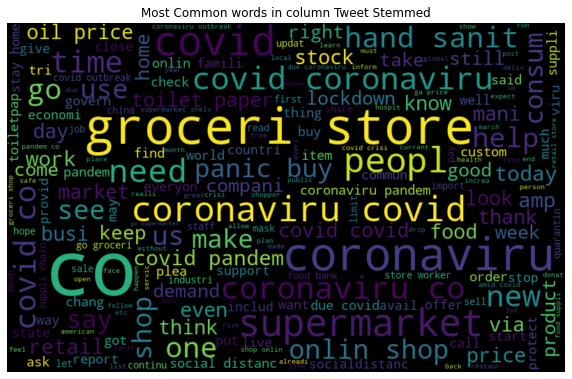

In [74]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in tweet_df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

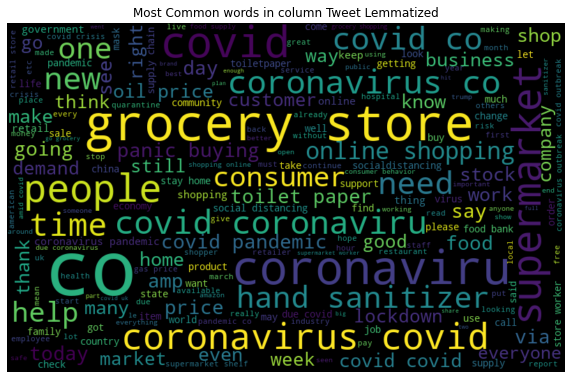

In [76]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in tweet_df['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

**Most common words in non racist/sexist tweets**

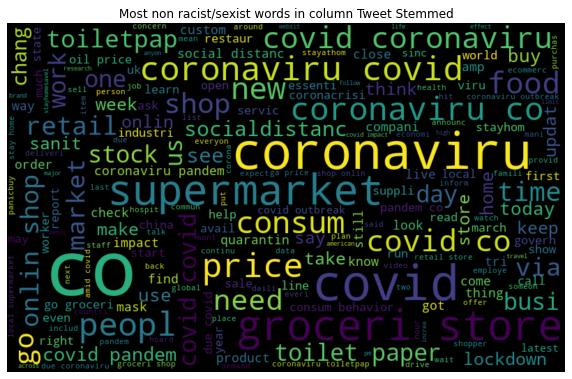

In [79]:
#Visualizing all the normal or non racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
normal_words =' '.join([text for text in tweet_df['tweet_stemmed'][tweet_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

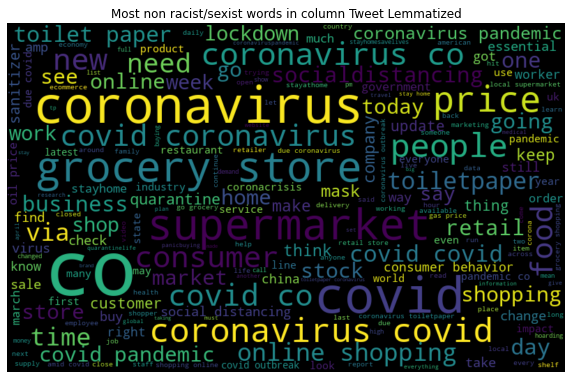

In [81]:
#Visualizing all the normal or non racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in tweet_df['tweet_lemmatized'][tweet_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Lemmatized")
plt.show()

In above plots we can see most of the words are positive or neutral. With happy and love being the most frequent ones

**Most common words in racist/sexist tweets**

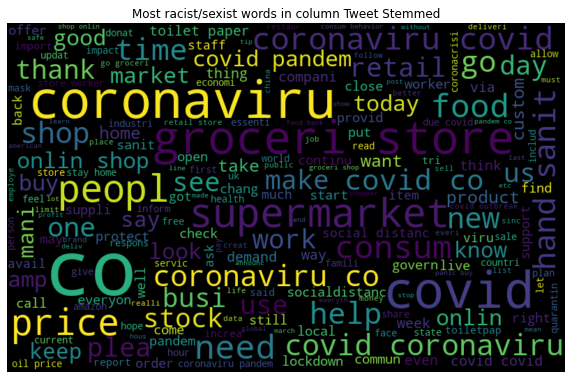

In [82]:
#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in tweet_df['tweet_stemmed'][tweet_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Stemmed")
plt.show()

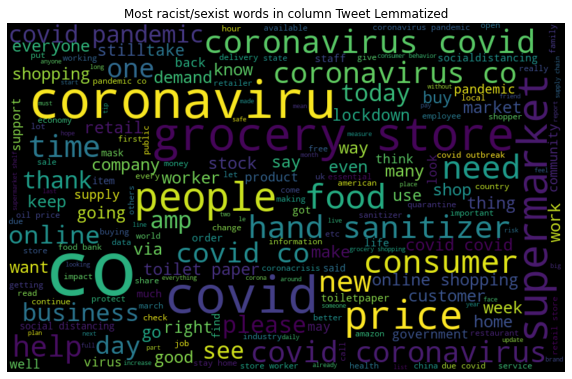

In [84]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in tweet_df['tweet_lemmatized'][tweet_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Lemmatized")
plt.show()

In above plots we can see most of the words are negative or racist/sexist. With racist, hate and black being the most frequent ones.

In [85]:
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,https co ifz fan pa and https co xx ghgfzcc an...,"[https, co, ifz, fan, pa, and, https, co, xx, ...","[https, co, ifz, fan, pa, https, co, xx, ghgfz...",http co ifz fan pa http co xx ghgfzcc http co ...,http co ifz fan pa http co xx ghgfzcc http co ...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the region first confirmed covid ca...,"[as, news, of, the, region, first, confirmed, ...","[news, region, first, confirmed, covid, case, ...",news region first confirm covid case came sull...,news region first confirmed covid case came su...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...,"[cashier, at, grocery, store, was, sharing, hi...","[cashier, grocery, store, sharing, insights, c...",cashier groceri store share insight covid prov...,cashier grocery store sharing insight covid pr...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today did not buy toile...,"[was, at, the, supermarket, today, did, not, b...","[supermarket, today, buy, toilet, paper, rebel...",supermarket today buy toilet paper rebel toile...,supermarket today buy toilet paper rebel toile...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid our retail store and classroom in...,"[due, to, covid, our, retail, store, and, clas...","[due, covid, retail, store, classroom, atlanta...",due covid retail store classroom atlanta open ...,due covid retail store classroom atlanta open ...
9,"For corona prevention,we should stop to buy th...",Negative,4,for corona prevention we should stop to buy th...,"[for, corona, prevention, we, should, stop, to...","[corona, prevention, stop, buy, things, cash, ...",corona prevent stop buy thing cash use onlin p...,corona prevention stop buy thing cash use onli...
10,All month there hasn't been crowding in the su...,Neutral,0,all month there has not been crowding in the s...,"[all, month, there, has, not, been, crowding, ...","[month, crowding, supermarkets, restaurants, h...",month crowd supermarket restaur howev reduc ho...,month crowding supermarket restaurant however ...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,due to the covid situation we have increased d...,"[due, to, the, covid, situation, we, have, inc...","[due, covid, situation, increased, demand, foo...",due covid situat increas demand food product w...,due covid situation increased demand food prod...


**A - Bag-of-Words Features**

In [86]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

**A.1 Bag-Of-Words feature matrix - For columns "combine_df['tweet_stemmed']"**

In [88]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(tweet_df['tweet_stemmed'])
bow_stem

<32567x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 375021 stored elements in Compressed Sparse Row format>

**A.2 Bag-Of-Words feature matrix - For column - combine_df['tweet_lemmatized']**

In [89]:
# bag-of-words feature matrix - For column - combine_df['tweet_lemmatized']
bow_lemm = bow_vectorizer.fit_transform(tweet_df['tweet_lemmatized'])
bow_lemm

<32567x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 343443 stored elements in Compressed Sparse Row format>

**B - TF-IDF Features**

In [90]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

**B.1 TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"**

In [91]:
# TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(tweet_df['tweet_stemmed'])
tfidf_stem

<32567x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 375021 stored elements in Compressed Sparse Row format>

**B.2 TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"**

In [92]:
# TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"
tfidf_lemm = tfidf_vectorizer.fit_transform(tweet_df['tweet_lemmatized'])
tfidf_lemm

<32567x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 343443 stored elements in Compressed Sparse Row format>

**Saving the processing file into the google drive's folder**

In [98]:

# # saving the dataframe 
# tweet_df.to_csv('/content/drive/My Drive/Colab Notebooks/Data/tweet_processing_file.csv')